### Imports necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load dataset

In [11]:
train = pd.read_csv('tested.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Missing Data

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data Visualization

<Axes: >

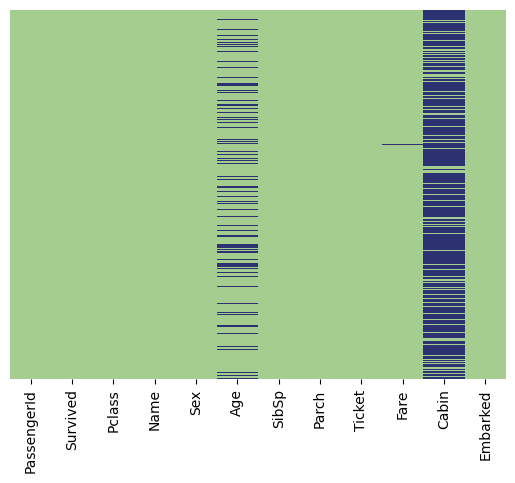

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='crest')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

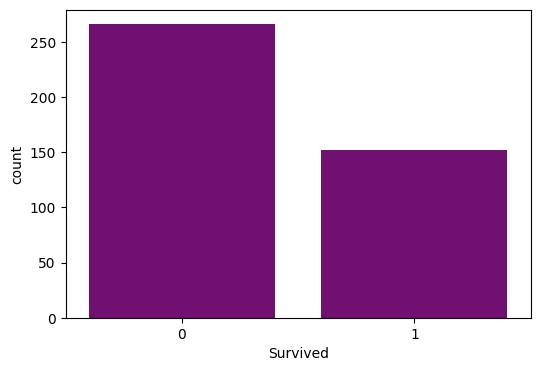

In [16]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Survived',data=train,color="purple")

<Axes: xlabel='Survived', ylabel='count'>

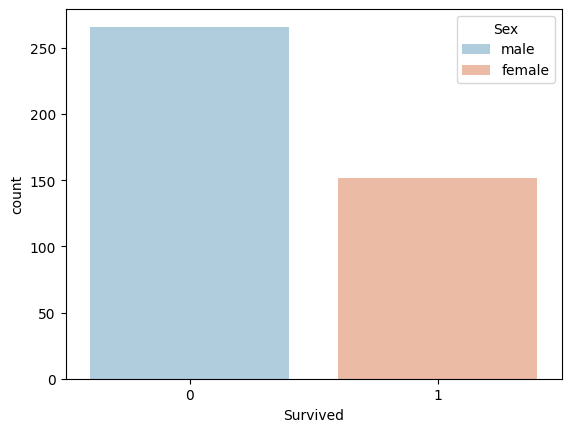

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

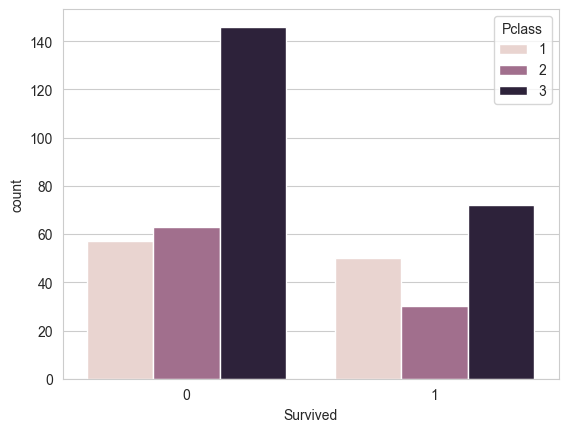

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,)

C:\Users\anj20\AppData\Local\Temp\ipykernel_17400\3226093717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=40)


<Axes: xlabel='Age'>

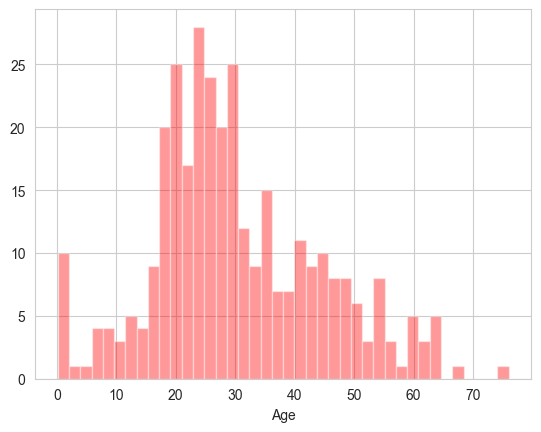

In [19]:
sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=40)

<Axes: >

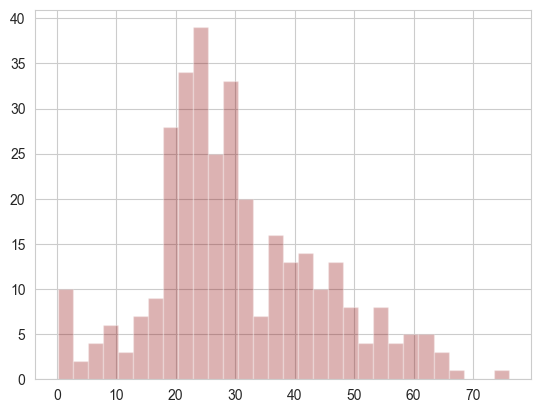

In [20]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

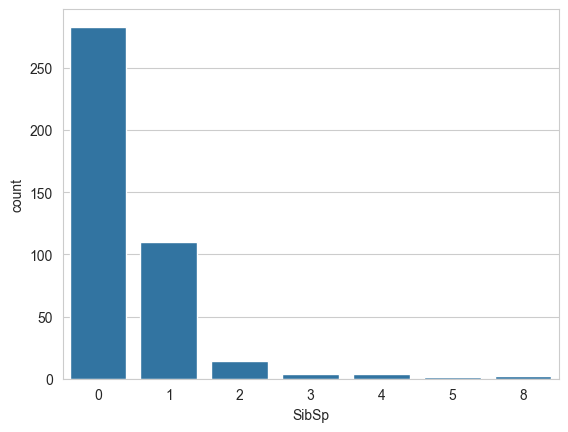

In [21]:
sns.countplot(x='SibSp',data=train)

<Axes: >

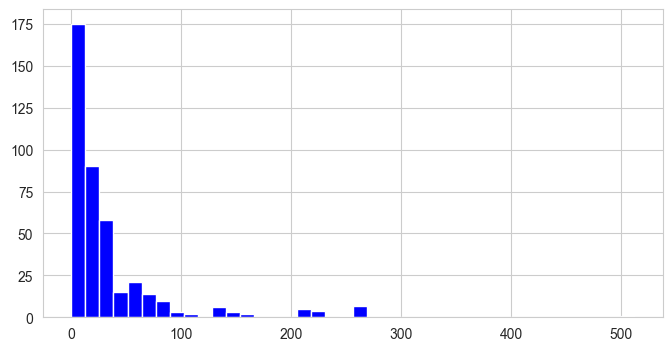

In [22]:
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


C:\Users\anj20\AppData\Local\Temp\ipykernel_17400\4121743619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

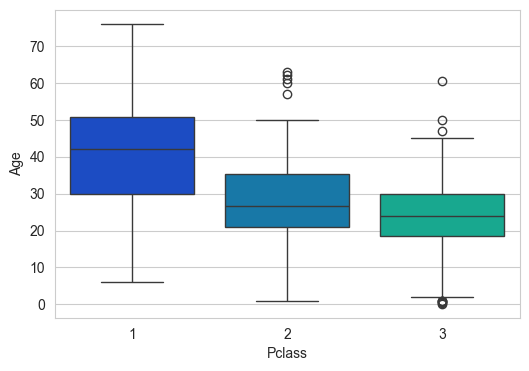

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [25]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\anj20\AppData\Local\Temp\ipykernel_17400\2216940440.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\anj20\AppData\Local\Temp\ipykernel_17400\2216940440.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


drop the Cabin column and the row in Fare
that is NaN.

In [26]:
train.drop('Cabin',axis=1,inplace=True)

Drops rows with any missing values.(only one row contain missing value)

In [27]:
train.dropna(inplace=True)

<Axes: >

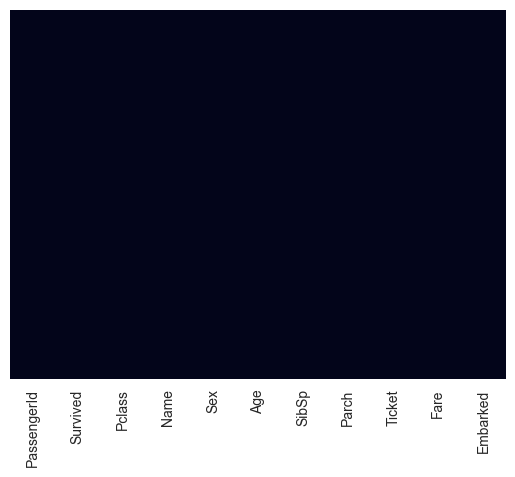

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,)

Visualizes missing data after cleaning using a heatmap.

In [29]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! 
Otherwise our machine learning algorithm won't be able to directly take
in those features as inputs.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


 Encoding Categorical Features !!!
Machine learning models require numerical input, so we convert categorical features like 'Sex' and 'Embarked' into numeric values.

In [31]:
pd.get_dummies(train['Embarked'],drop_first=True,dtype="int").head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [33]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [35]:
train = pd.concat([train,sex,embark],axis=1)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [37]:
train.shape

(417, 10)

Great! Our data is ready for our model!

## Building a  model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [40]:
X_train.shape

(291, 9)

In [41]:
X_test.shape

(126, 9)

In [42]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
237,1129,3,20.0,0,0,7.225,True,False,False
360,1252,3,14.5,8,2,69.550,True,False,True
355,1247,1,50.0,0,0,26.000,True,False,True
242,1134,1,45.0,1,1,134.500,True,False,False
247,1139,2,42.0,1,1,32.500,True,False,True


In [43]:
y_train.head()

237    0
360    0
355    0
242    0
247    0
Name: Survived, dtype: int64

### Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\anj20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions = model.predict(X_test)

### Evaluate Model

In [47]:
model.score(X_test,y_test)

1.0

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
accuracy=confusion_matrix(y_test,predictions)

In [50]:
accuracy

array([[65,  0],
       [ 0, 61]])

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

 Compute the confusion matrix to evaluate model performance

In [53]:
cm = confusion_matrix(y_test,predictions)

<Axes: >

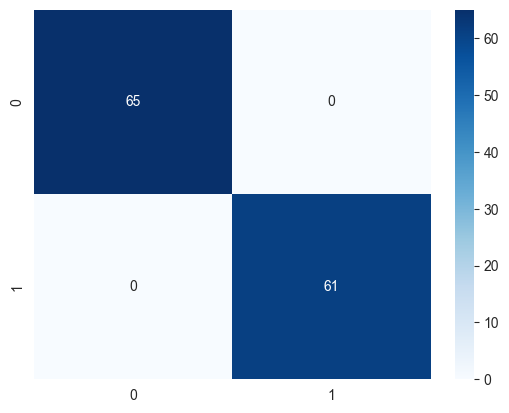

In [54]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

In [55]:
from sklearn.metrics import classification_report

### Generate a classification report for precision, recall, and F1-score

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier

In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Ensemble Learning

In [60]:
ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ('lr', LogisticRegression())
], voting='soft')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))

Ensemble Accuracy: 1.0


C:\Users\anj20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
